In [1]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas_profiling

In [2]:
df1 = pd.read_csv("frequency_domain_features_train .csv")
df2 = pd.read_csv("heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv("time_domain_features_train.csv")

In [3]:
df1.shape, df2.shape, df3.shape

((369289, 12), (369289, 7), (369289, 20))

In [4]:
df4 = df1.merge(right=df2,how='inner',on='uuid')

In [5]:
df4.shape

(369289, 18)

In [6]:
df5 = df4.merge(right=df3,how='inner',on='uuid')

In [7]:
df5.shape

(369289, 37)

In [8]:
df5.condition.nunique()

3

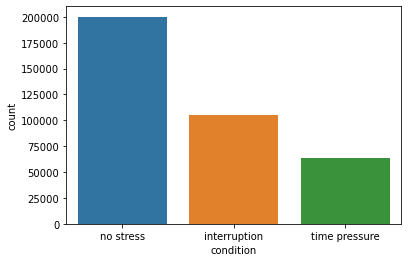

In [9]:
sns.countplot(df5["condition"])

In [10]:
conditions = [
    (df5['condition'] == "no stress"),
    (df5['condition'] == "interruption condition"),
    (df5['condition'] == "time pressure" )
    ]

In [11]:
values = [1,0,-1]

In [12]:
df5['condition2'] = np.select(conditions, values)

In [13]:
df6 = pd.read_csv("frequency_domain_features_test.csv")
df7 = pd.read_csv("heart_rate_non_linear_features_test.csv")
df8 = pd.read_csv("time_domain_features_test.csv")

In [14]:
df6.shape, df7.shape, df8.shape

((41033, 12), (41033, 7), (41033, 19))

In [15]:
df9 = df6.merge(right=df7,how='inner',on='uuid')
df10 = df9.merge(right=df8,how='inner',on='uuid')

In [16]:
conditions = [
    (df10['condition'] == "no stress"),
    (df10['condition'] == "interruption condition"),
    (df10['condition'] == "time pressure" )
    ]

In [17]:
values = [1,0,-1]

In [18]:
df10['condition2'] = np.select(conditions, values)

In [19]:
df10.shape

(41033, 37)

## Make uuid Index

In [20]:
df11 = df5.set_index('uuid')
df12 = df10.set_index('uuid')

### Features to drop

In [21]:
dftest = df12.drop(['condition','datasetId','SD1','SKEW_REL_RR','KURT_REL_RR',
                    'SDSD_REL_RR', 'SDRR', 'HF_NU','SDSD'], axis = 1)

In [22]:
dftrain = df11.drop(['condition','datasetId','SD1','SKEW_REL_RR','KURT_REL_RR',
                    'SDSD_REL_RR', 'SDRR', 'HF_NU','SDSD'], axis=1)

# Train and Test set

In [23]:
dftrain.shape, dftest.shape

((369289, 28), (41033, 27))

### Set up validation set from the training set

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
X = dftrain.drop("HR",axis=1)
y = dftrain["HR"]

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

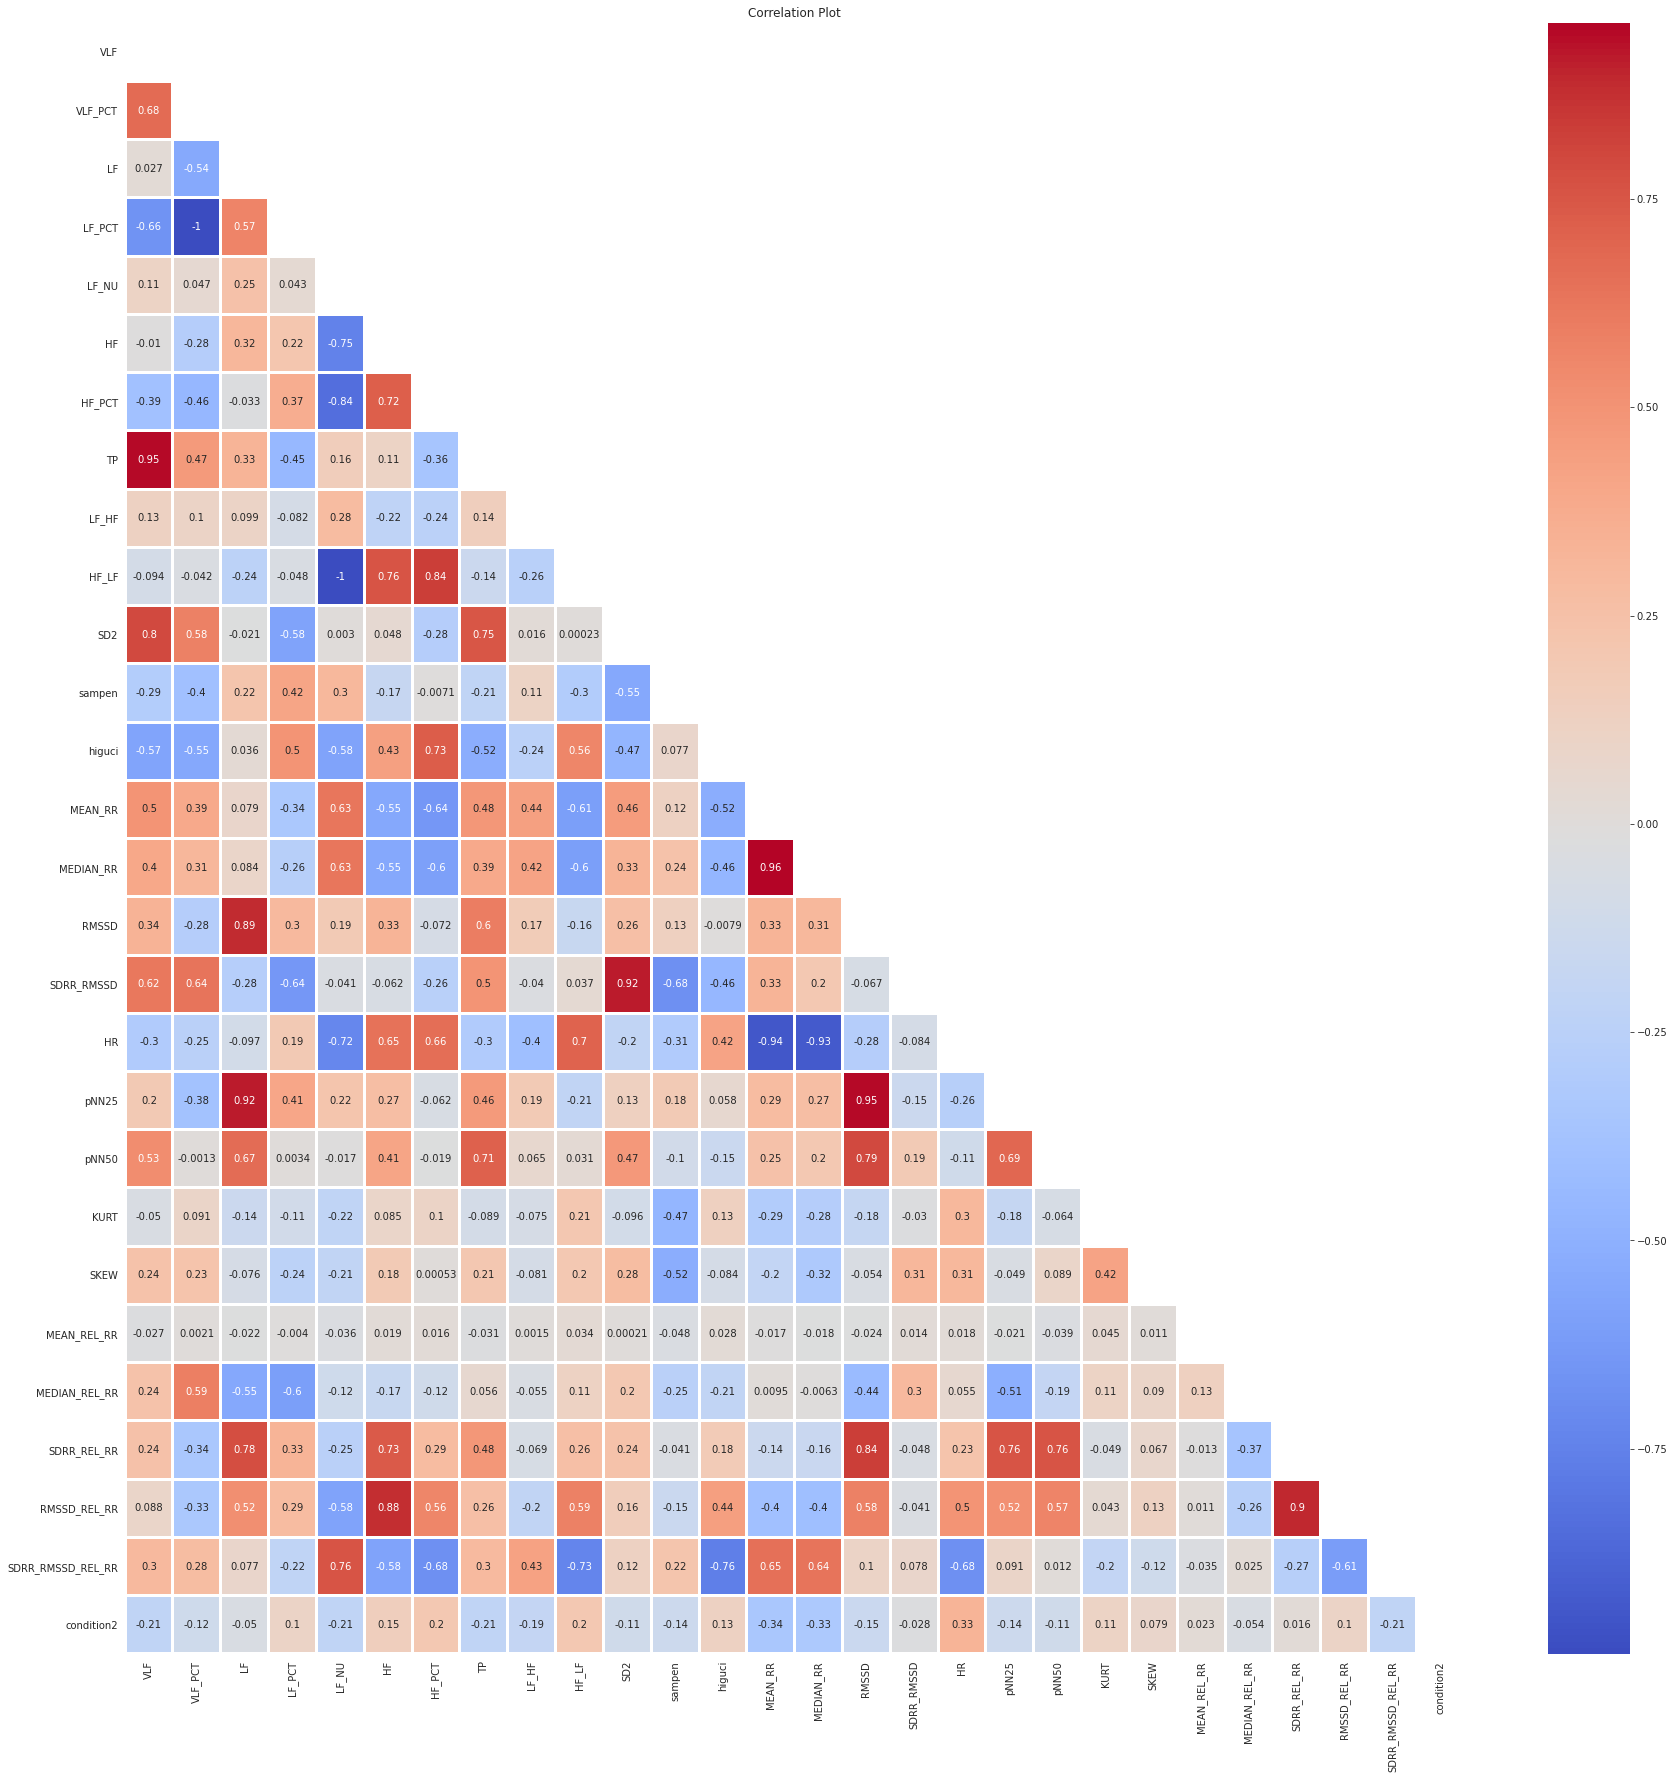

In [55]:
cor = dftrain.corr()
m = np.zeros_like(cor)
m[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=2,mask = m,cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [29]:
X_train.shape

(332360, 27)

In [30]:
X = dftrain.drop("HR",axis=1)
y = dftrain["HR"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

Random foresrt

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1, n_estimators=20, max_depth=50)
rf.fit(X_train,y_train)
#rf.score(X_train,y_train)
y_pred_rf_train=rf.predict(X_train)
y_pred_rf_val=rf.predict(X_val)
print('Train R2 score: ', r2_score(y_train,y_pred_rf_train))
print('Validation R2 score: ', r2_score(y_val,y_pred_rf_val))

Train R2 score:  0.999998542044168
Validation R2 score:  0.9999914444929416


In [34]:
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf_val))
mse_rf = mean_squared_error(y_val, y_pred_rf_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf_val)
r2_rf = r2_score(y_val, y_pred_rf_val)
adjr2_rf = 1-(1-r2_rf)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['Random Forest Validation'], 'RMSE': rmse_rf , 'MSE': mse_rf , 'MAE': mae_rf ,"R2": r2_rf, 'Adj_R2': adjr2_rf})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Random Forest Validation,0.030111,0.000907,0.007068,0.999991,0.999991


In [35]:
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
mse_rf = mean_squared_error(y_train, y_pred_rf_train)
mae_rf = mean_absolute_error(y_train, y_pred_rf_train)
r2_rf = r2_score(y_train, y_pred_rf_train)
adjr2_rf = 1-(1-r2_rf)*(len(y_train)-1)/(len(y_train)-len(X_train.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['Random Forest Train'], 'RMSE': rmse_rf , 'MSE': mse_rf , 'MAE': mae_rf ,"R2": r2_rf, 'Adj_R2': adjr2_rf})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Random Forest Train,0.012488,0.000156,0.003175,0.999999,0.999999


## Dataframe of predicted vs actual HR

In [36]:
pred_vs_actual = pd.DataFrame(y_val)
pred_vs_actual['predictedHR_RF'] = y_pred_rf_val
pred_vs_actual

,HR,predictedHR_RF
uuid,,
80ffbdb6-9cee-44b7-91b3-cf26ac25e5d5,67.923866,67.923024
eb61e4c8-c28f-4087-82b8-b427a5a52bef,76.960355,76.957515
80f5f9e2-a85d-4a51-8b89-39505b206ccf,76.086628,76.087156
c81a3c50-ee66-459a-9d55-a8261093c724,74.739285,74.729995
21eef6fc-3b7d-4ec7-a07e-202ca0075a4d,92.082130,92.084022
...,...,...
9d09efd1-8c82-4d48-9615-ba7d980635a2,56.797168,56.796194
f5f36380-eeeb-40c6-9d23-c23d253a3266,70.558553,70.558804
d219e619-cca3-4617-b297-ea2a06fac092,79.060016,79.053321


# Preform on test data

In [42]:
rf=RandomForestRegressor(random_state=1, n_estimators=20, max_depth=50)
rf.fit(X_train,y_train)
y_pred_rf_test=rf.predict(dftest)

In [48]:
pred_vs_actual = pd.DataFrame(dftest)
pred_vs_actual['predictedHR_RF'] = y_pred_rf_test


In [44]:
pred_vs_actual.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'TP',
       'LF_HF', 'HF_LF', 'SD2', 'sampen', 'higuci', 'MEAN_RR', 'MEDIAN_RR',
       'RMSSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'condition2', 'predictedHR_RF'],
      dtype='object')

In [46]:
Submission_yhats = pred_vs_actual.drop(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'TP',
       'LF_HF', 'HF_LF', 'SD2', 'sampen', 'higuci', 'MEAN_RR', 'MEDIAN_RR',
       'RMSSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'condition2'], axis=1)

# First Submission

In [47]:
Submission_yhats

,predictedHR_RF
uuid,
62b75db5-bc40-4c8f-9166-daf0efcab4c2,64.709097
a99549ad-3eb6-4413-bc90-9053e7f7e684,73.777200
cb573d3a-c767-4556-b32e-ad8c08ded214,69.196735
47a0c6de-2aef-4ac3-997d-252fa6fd07f1,60.196207
de3fd54f-c74e-4fe8-bf2a-7a127f68b312,77.815657
...,...
11253232-cf0a-4c40-abfb-ac2795effd9b,80.964073
38052c36-d08d-4305-905b-830f600ce2b9,98.671659
8ef3781b-512f-42ce-bcfd-47f5c1070bb0,60.952165


In [60]:
Submission_yhats.to_csv ('submission.csv', index = True, header=True)

# AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
ab = AdaBoostRegressor(n_estimators = 51, learning_rate=0.2, base_estimator=RandomForestRegressor(max_depth=5) , random_state=1)
ab.fit(X_train, y_train)
y_pred_ab_train=ab.predict(X_train)
y_pred_ab_val=ab.predict(X_val)
print('Train R2 score: ', r2_score(y_train,y_pred_ab_train))
print('Validation R2 score: ', r2_score(y_val,y_pred_ab_val))

KeyboardInterrupt: 

In [71]:
rmse_ab = np.sqrt(mean_squared_error(y_val, y_pred_ab_val))
mse_ab = mean_squared_error(y_val, y_pred_ab_val)
mae_ab = mean_absolute_error(y_val, y_pred_ab_val)
r2_ab = r2_score(y_val, y_pred_ab_val)
adjr2_ab = 1-(1-r2_ab)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['AdaBoost Validation'], 'RMSE': rmse_ab , 'MSE': mse_ab , 'MAE': mae_ab ,"R2": r2_ab, 'Adj_R2': adjr2_ab})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,AdaBoost Validation,2.369147,5.612858,1.800959,0.947035,0.946997


In [79]:
acc_depth1 = pd.DataFrame(index=range(1,10,1),columns=['ab train','ab val'])

for depth in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    # Accuracy score of RF model for different number of estimators
    ab = AdaBoostRegressor(n_estimators = 51, learning_rate= .2, random_state=22)
   
    #train accuracy
    ab.fit(X_train, y_train)
    preds1_clf_train = ab.predict(X_train)
    acc_depth1.loc[depth, 'ab train'] = mean_absolute_error(y_train, preds1_clf_train)
    
    #val accuracy
    preds1_clf_val = ab.predict(X_val)
    acc_depth1.loc[depth, 'ab val'] = mean_absolute_error(y_val, preds1_clf_val)
    
acc_depth1

,ab train,ab val
1.0,NaN,NaN
2.0,NaN,NaN
3.0,NaN,NaN
4.0,NaN,NaN
5.0,NaN,NaN
6.0,NaN,NaN
7.0,NaN,NaN
8.0,NaN,NaN
9.0,NaN,NaN
0.1,1.28477,1.27938


In [ ]:
	ab train	ab val
1	1.89237	1.88372
6	1.81619	1.81129
11	1.6207	1.61565
16	1.58094	1.57203
21	1.58211	1.57339
26	1.51087	1.50155
31	1.43949	1.42899
36	1.33674	1.32713
41	1.30969	1.30149
46	1.28781	1.28062
51	1.28477	1.27938